# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = format(len(X_train))

# TODO: Number of testing examples.
n_test = format(len(X_test))

# TODO: What's the shape of an traffic sign image?
image_shape =format(X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
(39209,)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

40


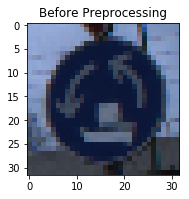

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.subplot(121),plt.imshow(X_train[index].squeeze()), plt.title("Before Preprocessing");
print(y_train[index])

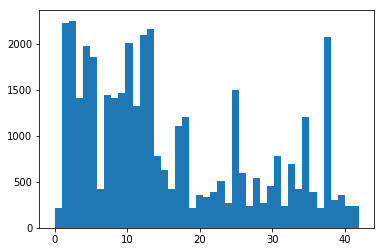

In [164]:
with open(training_file, mode='rb') as f:
    origtrain = pickle.load(f)
X_original, y_original = origtrain['features'], origtrain['labels']
plt.hist(y_original, bins=43);

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

(39209, 32, 32, 3)
(12630, 32, 32, 3)
(32, 32)


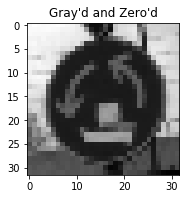

In [4]:
def makegloomy(img): #grayscale
    print (format(img.shape))
    return np.mean(img, axis=3)
def herotozero(img): #zero center data
    img -= np.mean(img)
    img /= np.std(img)
    return img

X_train = herotozero(makegloomy(X_train))
X_test = herotozero(makegloomy(X_test))

print (format(X_train[index].shape))

plt.subplot(121),plt.imshow(X_train[index].squeeze(), cmap="gray"), plt.title("Gray'd and Zero'd");

### Split Data into Training, Validation and Testing Sets

(39209, 32, 32)
(39209,)
0
5000
10000
15000
20000
25000
30000
35000
(235254, 32, 32)
(235254,)


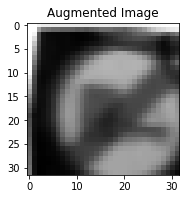

In [5]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2

runaugment = True #if there is no saved augmented data, set this to true. It takes a reaaaally long time though.

def augment_image(img):
    angle = 20
    shear = 10
    translate = 5
    size = 32

    rotate = np.random.uniform(angle)-angle/2  
    Rotation = cv2.getRotationMatrix2D((size/2,size/2),rotate,1)

    shift_x = translate*np.random.uniform()-translate/2
    shift_y = translate*np.random.uniform()-translate/2
    Final_Translate = np.float32([[1,0,shift_x],[0,1,shift_y]])

    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear*np.random.uniform()-shear/2
    pt2 = 20+shear*np.random.uniform()-shear/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    Final_Shear = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rotation,(size,size))
    img = cv2.warpAffine(img,Final_Translate,(size,size))
    img = cv2.warpAffine(img,Final_Shear,(size,size))

    return img

if runaugment == True: #augmentation process
    print (X_train.shape)
    print (y_train.shape)
    count = 0
    max = len(X_train)
    transformed = 5 #number of augmented images per sample
    img = np.zeros((1,32,32))
    yval = np.zeros((1,))

    while count < max:
        track = 0
        yval[0] = y_train[count]
        while track < transformed:
            img[0] = augment_image(X_train[count])
            X_train = np.concatenate((X_train, img), axis=0)
            y_train = np.concatenate((y_train, yval), axis=0) #update arrays
            track += 1
        if count % 5000 == 0:
            print (count) #for tracking purposes
        count += 1
    
    plt.subplot(121),plt.imshow(img[0].squeeze(), cmap="gray"), plt.title("Augmented Image");

    
print (X_train.shape)
print (y_train.shape) #That's a lot of data! Do the numbers match?

In [6]:
from tempfile import TemporaryFile

if runaugment == True: #save the augmented images; you're gonna want to.
    augmentedx = TemporaryFile()
    augmentedy = TemporaryFile()

    np.savez(augmentedx, X_train)
    np.savez(augmentedy, y_train)

In [7]:
if runaugment == False: #oh thank heavens you already have a save file
    augmentedx.seek(0)
    augmentedy.seek(0)
    npxfile = np.load(augmentedx)
    npxfile.files
    X_train = npxfile['arr_0']
    npyfile = np.load(augmentedy)
    npyfile.files
    y_train = npyfile['arr_0']

In [33]:
##set to true if you have irreversibly damaged the augmented data/test data set through some foolhardy exploration
fixaugment == True
if fixaugment == True:
    augmentedx.seek(0)
    augmentedy.seek(0)
    npxfile = np.load(augmentedx)
    npxfile.files
    X_train = npxfile['arr_0']
    npyfile = np.load(augmentedy)
    npyfile.files
    y_train = npyfile['arr_0']
    with open(testing_file, mode='rb') as f: ##RESET IT ALL
        test = pickle.load(f)
    X_test, y_test = test['features'], test['labels']
    X_test = herotozero(makegloomy(X_test))

In [87]:
X_train = np.reshape(X_train, X_train.shape + (1,))
X_test = np.reshape(X_test, X_test.shape + (1,))
print (X_train.shape)
print (X_test.shape) #ensure the samples are cubic

(188203, 32, 32, 1)
(12630, 32, 32, 1)


In [88]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation))) 

Training Set:   188203 samples
Validation Set: 47051 samples


### Model Architecture

In [91]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 50
BATCH_SIZE = 128
keep_prob = 1 #disable dropout as the architecture is not wide enough (hardware is not strog enough with so many samples)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 30x30x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation.
    conv1 = tf.nn.relu(conv1)

    #Layer 2: Convolutional. Output = 26x26x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation. Output = 13x13x24
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    #Layer 3: Convolutional. Output = 8x8x32.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(6, 6, 24, 32), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(32))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    #Activation. Output = 4x4x32
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv3 = tf.nn.dropout(conv3, keep_prob)
    
    fc0 = flatten(conv3)
    
    #Layer 4: Fully Connected. Input = 512. Output = 172.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(512, 172), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(172))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    #Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    #Layer 5: Fully Connected. Input = 172. Output = 86.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(172, 86), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(86))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    #Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    #Layer 6: Fully Connected. Input = 86. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(86, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [92]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        if i > 7:
            rate = .0001
            learning_rate = .0001
        if i > 15:
            rate = .0001
            learning_rate = .0001
        if i > 37:
            rate = .00001
            learning_rate = .00001
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    keep_prob = 1

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Training...

EPOCH 1 ...
Validation Accuracy = 0.842

EPOCH 2 ...
Validation Accuracy = 0.923

EPOCH 3 ...
Validation Accuracy = 0.946

EPOCH 4 ...
Validation Accuracy = 0.951

EPOCH 5 ...
Validation Accuracy = 0.959

EPOCH 6 ...
Validation Accuracy = 0.959

EPOCH 7 ...
Validation Accuracy = 0.961

EPOCH 8 ...
Validation Accuracy = 0.966

EPOCH 9 ...
Validation Accuracy = 0.970

EPOCH 10 ...
Validation Accuracy = 0.967

EPOCH 11 ...
Validation Accuracy = 0.970

EPOCH 12 ...
Validation Accuracy = 0.972

EPOCH 13 ...
Validation Accuracy = 0.971

EPOCH 14 ...
Validation Accuracy = 0.974

EPOCH 15 ...
Validation Accuracy = 0.971

EPOCH 16 ...
Validation Accuracy = 0.974

EPOCH 17 ...
Validation Accuracy = 0.969

EPOCH 18 ...
Validation Accuracy = 0.970

EPOCH 19 ...
Validation Accuracy = 0.972

EPOCH 20 ...
Validation Accuracy = 0.977

EPOCH 21 ...
Validation Accuracy = 0.976

EPOCH 22 ...
Validation Accuracy = 0.976

EPOCH 23 ...
Validation Accuracy = 0.974

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 3)
(5, 32, 32, 3)


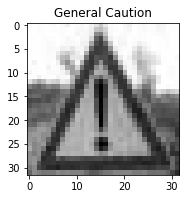

In [116]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
int_test = np.zeros((5,32,32,3))
int_test[0] = mpimg.imread('generalcaution18.jpg')
int_test[1] = mpimg.imread('nopassing9.jpg')
int_test[2] = mpimg.imread('roadwork25.jpg')
int_test[3] = mpimg.imread('roughroad22.jpg')
int_test[4] = mpimg.imread('stop14.jpg')
print (int_test[0].shape)
int_test = herotozero(makegloomy(int_test))
int_test = np.reshape(int_test, int_test.shape + (1,))
Int_labels = np.zeros((5,))
Int_labels[0,] = 18
Int_labels[1,] = 9
Int_labels[2,] = 25
Int_labels[3,] = 22
Int_labels[4,] = 14

plt.subplot(121),plt.imshow(int_test[0].squeeze(), cmap="gray"), plt.title("General Caution");

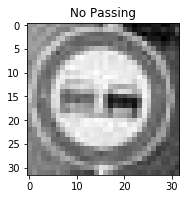

In [117]:
plt.subplot(121),plt.imshow(int_test[1].squeeze(), cmap="gray"), plt.title("No Passing");

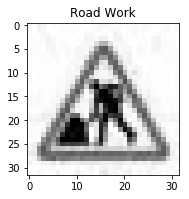

In [118]:
plt.subplot(121),plt.imshow(int_test[2].squeeze(), cmap="gray"), plt.title("Road Work");

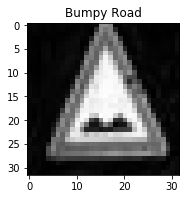

In [120]:
plt.subplot(121),plt.imshow(int_test[3].squeeze(), cmap="gray"), plt.title("Bumpy Road");

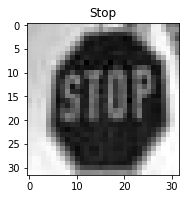

In [121]:
plt.subplot(121),plt.imshow(int_test[4].squeeze(), cmap="gray"), plt.title("Stop");

### Predict the Sign Type for Each Image

In [122]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    keep_prob = 1

    internet_accuracy = evaluate(int_test, Int_labels)
    print("Internet Accuracy = {:.3f}".format(internet_accuracy))

Internet Accuracy = 0.800


### Analyze Performance

In [124]:
accuracy = internet_accuracy*100
print ("The Internet Accuracy is %.0f%%" % accuracy)

The Internet Accuracy is 80%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [162]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x:int_test})
    values, indices = tf.nn.top_k(result, 5)
    probs = sess.run(values)
    predictions = sess.run(indices)
    max = len(int_test)
    count = 0
    while count < max:
        top_k = tf.nn.top_k(predictions[count], k=5)
        indices = top_k.indices.eval()
        values = top_k.values.eval()
        print (indices)
        print (values)
        print (probs[count])
        count += 1

[2 1 3 4 0]
[27 26 25 23 18]
[  1.00000000e+00   3.79127498e-23   9.60263814e-25   1.65575508e-30
   2.78440403e-35]
[1 0 4 3 2]
[16  9  2  1  0]
[  1.00000000e+00   6.17061213e-29   0.00000000e+00   0.00000000e+00
   0.00000000e+00]
[4 2 1 3 0]
[35 27 26 18 11]
[  1.00000000e+00   3.08112513e-09   1.89050386e-10   2.51815474e-12
   1.04265717e-12]
[1 0 4 3 2]
[23 22  2  1  0]
[  1.00000000e+00   1.64725949e-34   0.00000000e+00   0.00000000e+00
   0.00000000e+00]
[4 2 3 0 1]
[38 33 26 14  1]
[  1.00000000e+00   3.76357097e-20   1.21002468e-20   1.56813431e-22
   1.52387631e-22]


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 